In [1]:
import sys
print(sys.path)
sys.path.extend(['/home/pshah/Documents/code/reproducible_figures-main',
                '/home/pshah/Documents/code/AllOpticalSeizure/'])

import matplotlib.pyplot as plt
import pandas as pd
from funcsforprajay.funcs import flattenOnce

plt.style.use(['use_mathtext'])

from funcsforprajay.plotting.plotting import plot_bar_with_points
from matplotlib.transforms import Bbox
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


['/home/pshah/Documents/code/AllOpticalSeizure/Figures/notebooks', '/Applications/NEURON-7.6/nrn/lib/python', '/home/pshah/Documents/code/AllOpticalSeizure/Figures/notebooks', '/home/pshah/anaconda3/envs/allopticalsz2/lib/python39.zip', '/home/pshah/anaconda3/envs/allopticalsz2/lib/python3.9', '/home/pshah/anaconda3/envs/allopticalsz2/lib/python3.9/lib-dynload', '', '/home/pshah/anaconda3/envs/allopticalsz2/lib/python3.9/site-packages', '/home/pshah/Documents/code/funcsforprajay/src', '/home/pshah/Documents/code/imagingplus/src']


In [2]:
from _exp_metainfo_.exp_metainfo import ExpMetainfo

from _analysis_._ClassPhotostimAnalysisSlmTargets import PhotostimAnalysisSlmTargets
from _analysis_._ClassPhotostimResponseQuantificationSLMtargets import PhotostimResponsesSLMtargetsResults
from _analysis_.sz_analysis._ClassExpSeizureAnalysis import ExpSeizureAnalysis, ExpSeizureResults
from _main_.Post4apMain import Post4ap
from _utils_.io import import_expobj
from _utils_.alloptical_plotting import save_figure


Loading Results Analysis object from /home/pshah/mnt/qnap/Analysis/analysis_export/analysis_quantification_classes/Results__PhotostimResponsesSLMtargets.pkl ... 
Loading Results Analysis object from /home/pshah/mnt/qnap/Analysis/analysis_export/analysis_quantification_classes/Results__ExpSeizure.pkl ... 


In [3]:
import numpy as np
import rep_fig_vis as rfv

results: PhotostimResponsesSLMtargetsResults = PhotostimResponsesSLMtargetsResults.load()
main = PhotostimAnalysisSlmTargets


SAVE_FOLDER = f'/home/pshah/Documents/figures/alloptical_seizures_draft/'
fig_items = f'/home/pshah/Documents/figures/alloptical_seizures_draft/figure-items/'


Loading Results Analysis object from /home/pshah/mnt/qnap/Analysis/analysis_export/analysis_quantification_classes/Results__PhotostimResponsesSLMtargets.pkl ... 


In [4]:
results = main.collect__interictal_responses_split(rerun=1, analysis_type='dFF responses')


 ********** [3] INITIATING FOR LOOP ACROSS EXPS FOR func: <function PhotostimAnalysisSlmTargets.collect__interictal_responses_split.<locals>.collect_avg_photostim_response_preictal at 0x7f073dba6310> ..........


----- RUNNING POST4AP TRIALS -----: [['RL108 t-013'], ['RL109 t-018'], ['PS04 t-018'], ['PS07 t-011'], ['PS06 t-013'], ['PS11 t-011']]

---------- SKIPPING TRIALS -----: ['PS06 t-013']
Python 3.9.7 (default, Sep 16 2021, 13:09:58) 12-18/RL108/2020-12-18_t-013/2020-12-18_t-013.pkl
[GCC 7.5.0] on linux
Loading Results Analysis object from /home/pshah/mnt/qnap/Analysis/analysis_export/analysis_quantification_classes/Results__PhotostimResponsesSLMtargets.pkl ... 
|- Loaded RL108 t-013 (from /home/pshah/mnt/qnap/Analysis/2020-12-18/RL108/2020-12-18_t-013/2020-12-18_t-013.pkl) ... DONE
STARTING on: post 4ap 2p all optical RL108 t-013 ...............
................... post 4ap 2p all optical RL108 t-013 FINISHED 

|- Loaded RL109 t-018 (from /home/pshah/mnt/qnap/Analysis/2020-12-1

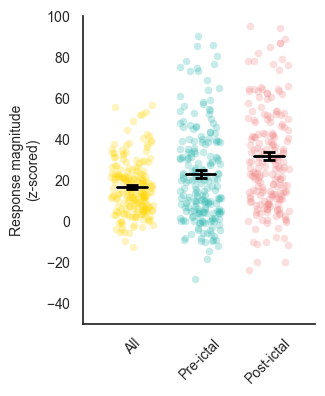

In [5]:
# figure for individual targets pooled across exps:
preictal_responses = flattenOnce(results.interictal_responses['preictal_responses'])
postictal_responses = flattenOnce(results.interictal_responses['postictal_responses'])
interictal_responses = flattenOnce(results.interictal_responses['very_interictal_responses'])  ## remember that these are currently actually ALL interictal stims idx's

to_plot = [interictal_responses, preictal_responses, postictal_responses]

fig, ax = plt.subplots(figsize=(3,4), dpi=100)

plot_bar_with_points(data=to_plot, bar=False, title='', fontsize=10, points_lw=0,
                     x_tick_labels=['All', 'Pre-ictal', 'Post-ictal'], colors=['gold', 'lightseagreen', 'lightcoral'],
                     y_label='Response magnitude\n(z-scored)', show=False, ylims=[-50, 100],
                     alpha=0.25, fig=fig, ax=ax, s=30, lw=2)
fig.show()


In [6]:
# 1-WAY ANOVA
stats.f_oneway(preictal_responses,
               interictal_responses,
              postictal_responses)

# create DataFrame to hold data
data_nums = []
num_pre = len(preictal_responses)
num_mid = len(interictal_responses)
num_post = len(postictal_responses)
data_nums.extend(['pre'] * num_pre)
data_nums.extend(['mid'] * num_mid)
data_nums.extend(['post'] * num_post)

df = pd.DataFrame({'score': flattenOnce([preictal_responses,
                                         interictal_responses,
                                         postictal_responses]),
                   'group': data_nums})

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['score'], groups=df['group'],
                          alpha=0.05)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   mid   post  14.8433    0.0   9.1521 20.5345   True
   mid    pre   6.1641   0.03   0.4728 11.8553   True
  post    pre  -8.6792 0.0011 -14.3704  -2.988   True
-----------------------------------------------------


In [7]:
# paired t-test
t, p = stats.ttest_rel(interictal_responses, postictal_responses)
print(f"interictal vs. post: t = {t}, p = {p}")


t, p = stats.ttest_rel(interictal_responses, preictal_responses)
print(f"interictal vs. pre: t = {t}, p = {p}")


interictal vs. post: t = -8.799462795037464, p = 6.621985984334843e-16
interictal vs. pre: t = -4.275930158307181, p = 2.9523944377245866e-05


# z scored responses

In [8]:
results = main.collect__interictal_responses_split(rerun=1, analysis_type='z scored to baseline')


 ********** [3] INITIATING FOR LOOP ACROSS EXPS FOR func: <function PhotostimAnalysisSlmTargets.collect__interictal_responses_split.<locals>.collect_avg_photostim_response_preictal at 0x7f06f6260040> ..........


----- RUNNING POST4AP TRIALS -----: [['RL108 t-013'], ['RL109 t-018'], ['PS04 t-018'], ['PS07 t-011'], ['PS06 t-013'], ['PS11 t-011']]

---------- SKIPPING TRIALS -----: ['PS06 t-013']
|- Loaded RL108 t-013 (from /home/pshah/mnt/qnap/Analysis/2020-12-18/RL108/2020-12-18_t-013/2020-12-18_t-013.pkl) ... DONE
STARTING on: post 4ap 2p all optical RL108 t-013 ...............
................... post 4ap 2p all optical RL108 t-013 FINISHED 

|- Loaded RL109 t-018 (from /home/pshah/mnt/qnap/Analysis/2020-12-19/RL109/2020-12-19_t-018/2020-12-19_t-018.pkl) ... DONE
STARTING on: post 4ap 2p all optical RL109 t-018 ...............
................... post 4ap 2p all optical RL109 t-018 FINISHED 

|- Loaded PS04 t-018 (from /home/pshah/mnt/qnap/Analysis/2021-01-09/PS04/2021-01-09_t-018/2

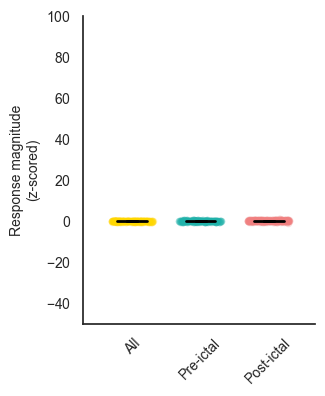

In [9]:
# figure for individual targets pooled across exps:
preictal_responses = flattenOnce(results.interictal_responses['preictal_responses'])
postictal_responses = flattenOnce(results.interictal_responses['postictal_responses'])
interictal_responses = flattenOnce(results.interictal_responses['very_interictal_responses'])  ## remember that these are currently actually ALL interictal stims idx's

to_plot = [interictal_responses, preictal_responses, postictal_responses]

fig, ax = plt.subplots(figsize=(3,4), dpi=100)

plot_bar_with_points(data=to_plot, bar=False, title='', fontsize=10, points_lw=0,
                     x_tick_labels=['All', 'Pre-ictal', 'Post-ictal'], colors=['gold', 'lightseagreen', 'lightcoral'],
                     y_label='Response magnitude\n(z-scored)', show=False, ylims=[-50, 100],
                     alpha=0.25, fig=fig, ax=ax, s=30, lw=2)
fig.show()


In [10]:
# 1-WAY ANOVA
stats.f_oneway(preictal_responses,
               interictal_responses,
              postictal_responses)

# create DataFrame to hold data
data_nums = []
num_pre = len(preictal_responses)
num_mid = len(interictal_responses)
num_post = len(postictal_responses)
data_nums.extend(['pre'] * num_pre)
data_nums.extend(['mid'] * num_mid)
data_nums.extend(['post'] * num_post)

df = pd.DataFrame({'score': flattenOnce([preictal_responses,
                                         interictal_responses,
                                         postictal_responses]),
                   'group': data_nums})

# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=df['score'], groups=df['group'],
                          alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   mid   post   0.2659  -0.0  0.2172  0.3147   True
   mid    pre   0.0919   0.0  0.0432  0.1407   True
  post    pre   -0.174  -0.0 -0.2228 -0.1252   True
---------------------------------------------------


In [11]:
# paired t-test
t, p = stats.ttest_rel(interictal_responses, postictal_responses)
print(f"interictal vs. post: t = {t}, p = {p}")


t, p = stats.ttest_rel(interictal_responses, preictal_responses)
print(f"interictal vs. pre: t = {t}, p = {p}")


interictal vs. post: t = -10.919851392347212, p = 4.709227004944796e-22
interictal vs. pre: t = -4.300880089017441, p = 2.6640588127652e-05
